Bioinformatics Project - Computational Drug Discovery [Part 5] Comparing Regressors
Chanin Nantasenamat

'Data Professor' YouTube channel

In this Jupyter notebook, we will be building a real-life data science project that you can include in your data science portfolio. Particularly, we will be building a machine learning model using the ChEMBL bioactivity data.

In Part 5, we will be comparing several ML algorithms for build regression models of acetylcholinesterase inhibitors using lazypredict python library

1. Import libraries

In [1]:
! pip install lazypredict

  Using cached six-1.15.0-py2.py3-none-any.whl (10 kB)


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fbprophet 0.7.1 requires cmdstanpy==0.9.5, which is not installed.
fbprophet 0.7.1 requires setuptools-git>=1.2, which is not installed.
daal4py 2021.3.0 requires daal==2021.2.3, which is not installed.
tensorflow 2.3.0 requires gast==0.3.3, but you have gast 0.4.0 which is incompatible.
tensorflow 2.3.0 requires numpy<1.19.0,>=1.16.0, but you have numpy 1.19.1 which is incompatible.
tensorflow 2.3.0 requires scipy==1.4.1, but you have scipy 1.5.4 which is incompatible.
tensorflow 2.3.0 requires tensorflow-estimator<2.4.0,>=2.3.0, but you have tensorflow-estimator 2.5.0 which is incompatible.
requests-cache 0.7.2 requires pyyaml>=5.4, but you have pyyaml 5.3.1 which is incompatible.
dash 1.19.0 requires dash-core-components==1.15.0, but you have dash-core-components 1.3.1 which is incompatible.
dash 1.19.0 require

  Attempting uninstall: numpy
    Found existing installation: numpy 1.18.4
    Uninstalling numpy-1.18.4:
      Successfully uninstalled numpy-1.18.4
  Attempting uninstall: six
    Found existing installation: six 1.14.0
    Uninstalling six-1.14.0:
      Successfully uninstalled six-1.14.0
  Attempting uninstall: scipy
    Found existing installation: scipy 1.6.2
    Uninstalling scipy-1.6.2:
      Successfully uninstalled scipy-1.6.2
  Attempting uninstall: joblib
    Found existing installation: joblib 1.0.1
    Uninstalling joblib-1.0.1:
      Successfully uninstalled joblib-1.0.1
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.24.2
    Uninstalling scikit-learn-0.24.2:
      Successfully uninstalled scikit-learn-0.24.2
  Attempting uninstall: tqdm
    Found existing installation: tqdm 4.61.2
    Uninstalling tqdm-4.61.2:
      Successfully uninstalled tqdm-4.61.2
  Attempting uninstall: PyYAML
    Found existing installation: PyYAML 5.4.1
   

In [2]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import lazypredict
from lazypredict.Supervised import LazyRegressor
import matplotlib.pyplot as plt


D:\anaconda\envs\work\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


Load the data set

In [3]:
#! wget https://raw.githubusercontent.com/Rodhanp/Drug-Discovery/main/3_Dataset%20Preparation/output/05082021/DAT/DAT_bioactivity_data_3class_pIC50_pubchem_fp_05082021.csv
df_url = 'https://raw.githubusercontent.com/Rodhanp/Drug-Discovery/main/3_Dataset%20Preparation/output/05082021/DAT/DAT_bioactivity_data_3class_pIC50_pubchem_fp_05082021.csv'

--2021-08-04 00:21:32--  https://raw.githubusercontent.com/Rodhanp/Drug-Discovery/main/3_Dataset%20Preparation/output/acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp_03082021.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9089397 (8.7M) [text/plain]
Saving to: ‘acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp_03082021.csv.2’

acetylcholinesteras 100%[===================>]   8.67M  --.-KB/s    in 0.09s   

2021-08-04 00:21:32 (102 MB/s) - ‘acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp_03082021.csv.2’ saved [9089397/9089397]



In [4]:
df = pd.read_csv(df_url)
df

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,PubchemFP10,PubchemFP11,PubchemFP12,PubchemFP13,PubchemFP14,PubchemFP15,PubchemFP16,PubchemFP17,PubchemFP18,PubchemFP19,PubchemFP20,PubchemFP21,PubchemFP22,PubchemFP23,PubchemFP24,PubchemFP25,PubchemFP26,PubchemFP27,PubchemFP28,PubchemFP29,PubchemFP30,PubchemFP31,PubchemFP32,PubchemFP33,PubchemFP34,PubchemFP35,PubchemFP36,PubchemFP37,PubchemFP38,PubchemFP39,...,PubchemFP842,PubchemFP843,PubchemFP844,PubchemFP845,PubchemFP846,PubchemFP847,PubchemFP848,PubchemFP849,PubchemFP850,PubchemFP851,PubchemFP852,PubchemFP853,PubchemFP854,PubchemFP855,PubchemFP856,PubchemFP857,PubchemFP858,PubchemFP859,PubchemFP860,PubchemFP861,PubchemFP862,PubchemFP863,PubchemFP864,PubchemFP865,PubchemFP866,PubchemFP867,PubchemFP868,PubchemFP869,PubchemFP870,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6.12
1,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7.00
2,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.30
3,1,1,0,0,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6.52
4,1,1,0,0,0,0,0,0,0,1,1,1,0,0,1,1,1,0,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5098,1,1,1,1,0,0,0,0,0,1,1,1,1,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.58
5099,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6.13
5100,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6.29
5101,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,0,0,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.90


In [5]:
X = df.drop('pIC50', axis =1)
Y = df.pIC50

Data Preprocessing

In [6]:
#Examine X and Y dimensions
X.shape, Y.shape

((5103, 881), (5103,))

In [14]:
#Remove all features that are either one or zero in more than 80% of the samples. 
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8*(1- .8)))
X=selection.fit_transform(X)
X.shape

(5103, 140)

In [15]:
#Splitting the data in 80/20 ratio
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

Compare ML Algorithms

In [28]:
# Defines and builds the lazyclassifier
clf = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)
train,test = clf.fit(X_train, X_test, Y_train, Y_test)
#models_train,predictions_train = clf.fit(X_train, X_train, Y_train, Y_train)
#models_test,predictions_test = clf.fit(X_test, X_test, Y_test, Y_test)

100%|██████████| 42/42 [00:57<00:00,  1.36s/it]


In [29]:
#Performance table of the training set (80% subset)
train
#predictions_train


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
LGBMRegressor,0.45,0.52,1.11,0.44
HistGradientBoostingRegressor,0.45,0.52,1.11,2.47
RandomForestRegressor,0.42,0.50,1.13,5.03
BaggingRegressor,0.41,0.49,1.14,0.59
XGBRegressor,0.40,0.48,1.15,2.12
SVR,0.39,0.47,1.16,5.07
NuSVR,0.38,0.47,1.17,4.15
KNeighborsRegressor,0.38,0.47,1.17,1.34
MLPRegressor,0.34,0.43,1.21,7.40


In [30]:
#Performance table of the test set (20% subset)
test
#predictions_test

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
LGBMRegressor,0.45,0.52,1.11,0.44
HistGradientBoostingRegressor,0.45,0.52,1.11,2.47
RandomForestRegressor,0.42,0.50,1.13,5.03
BaggingRegressor,0.41,0.49,1.14,0.59
XGBRegressor,0.40,0.48,1.15,2.12
SVR,0.39,0.47,1.16,5.07
NuSVR,0.38,0.47,1.17,4.15
KNeighborsRegressor,0.38,0.47,1.17,1.34
MLPRegressor,0.34,0.43,1.21,7.40


[(0.0, 1.0)]

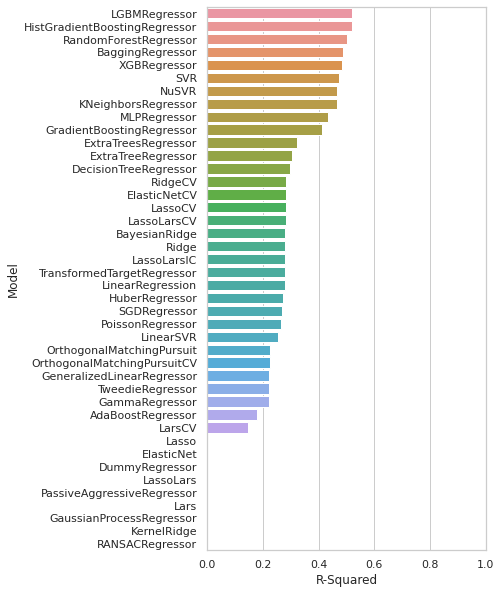

In [34]:
#train ["R-Squared"] = [0 if i<0 else i for i in train.iloc[:,0]]
plt.figure(figsize=(5,10))
sns.set_theme(style="whitegrid")
ax=sns.barplot(y=train.index, x="R-Squared", data=train )
ax.set(xlim=(0,1))


[(0.0, 10.0)]

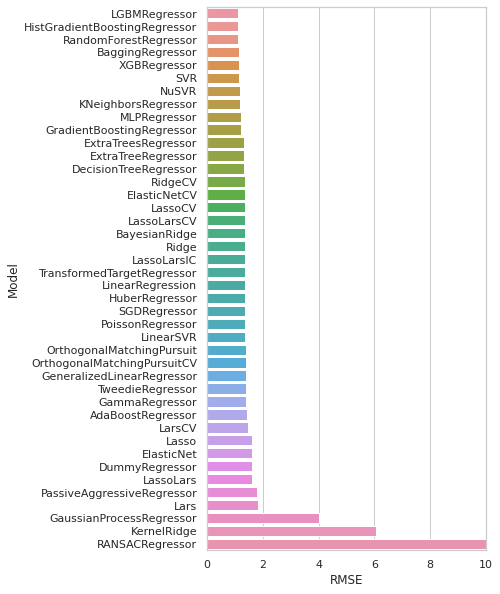

In [33]:
#Bar plot of RMSE
plt.figure(figsize=(5,10))
sns.set_theme(style="whitegrid")
ax=sns.barplot(y=train.index, x="RMSE", data=train )
ax.set(xlim=(0,10))


[(0.0, 10.0)]

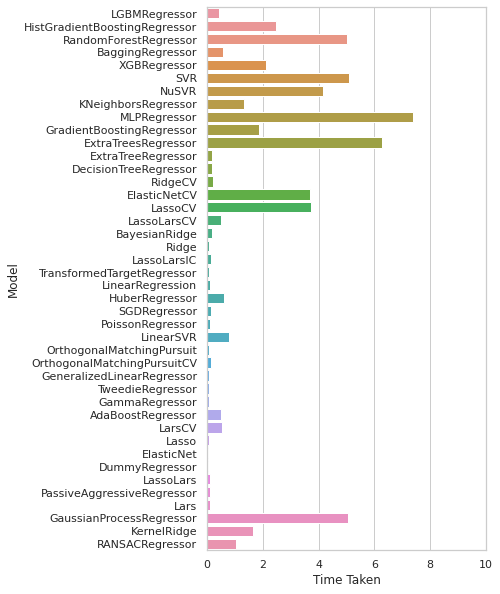

In [32]:
#Bar plot of calculation time
plt.figure(figsize=(5,10))
sns.set_theme(style="whitegrid")
ax=sns.barplot(y=train.index, x="Time Taken", data=train )
ax.set(xlim=(0,10))
